# Movie: Linear regression

### Variable definitions
- open: release date
- budget: production budget
- rev: box office revenues
- rating: consumer ratings
- sequel: 1 if the move is a sequel
- ad: advertising spending
- scrn: average number of screens during the movie's run

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as sm
import statsmodels.api as sm1  # alternative

In [2]:
df = pd.read_csv('Movie.csv')
df.head()

,title,open,rev,budget,ad,rating,scrn,sequel
0,13 GOING ON 30,4/23/2004,69540400,44957472,36712516,6.1,1229,NoSeq
1,16 BLOCKS,3/3/2006,42021800,51252848,30141800,6.7,1042,NoSeq
2,2 FAST 2 FURIOUS,6/6/2003,158745200,94881400,47201120,5.0,1073,Seq
3,21 GRAMS,11/21/2003,20337672,24968790,12344444,7.9,193,NoSeq
4,28 DAYS LATER,6/27/2003,56260816,9987516,13260048,7.6,521,NoSeq


### 1. Report summary statistics of the variables in the data (N, Mean, Std. Dev., Min, Max)

In [3]:
df.describe()

,rev,budget,ad,rating,scrn
count,5.610000e+02,5.610000e+02,5.610000e+02,561.000000,561.000000
mean,7.282073e+07,5.624742e+07,2.683935e+07,6.194831,988.094474
std,7.634626e+07,4.847843e+07,1.314194e+07,1.215609,445.389917
min,7.652995e+06,6.242200e+04,3.137500e+04,1.400000,27.000000
25%,2.566093e+07,2.247191e+07,1.713572e+07,5.400000,705.000000
50%,4.904473e+07,4.112808e+07,2.594536e+07,6.300000,950.000000
75%,8.606532e+07,7.490637e+07,3.534230e+07,7.100000,1233.000000
max,5.361194e+08,3.075171e+08,7.470513e+07,8.800000,2557.000000


### 2.	Create a dummy variable for Sequel

In [4]:
# Method 1

df['seq_dum']=(df.sequel=='Seq')  # returns boolian indicator (true or false)
df.head()

,title,open,rev,budget,ad,rating,scrn,sequel,seq_dum
0,13 GOING ON 30,4/23/2004,69540400,44957472,36712516,6.1,1229,NoSeq,False
1,16 BLOCKS,3/3/2006,42021800,51252848,30141800,6.7,1042,NoSeq,False
2,2 FAST 2 FURIOUS,6/6/2003,158745200,94881400,47201120,5.0,1073,Seq,True
3,21 GRAMS,11/21/2003,20337672,24968790,12344444,7.9,193,NoSeq,False
4,28 DAYS LATER,6/27/2003,56260816,9987516,13260048,7.6,521,NoSeq,False


In [5]:
df['seq_dum']=(df.sequel=='Seq').astype('int')
 # astype: Cast pandas object to specified data type (integer)
df.head()

,title,open,rev,budget,ad,rating,scrn,sequel,seq_dum
0,13 GOING ON 30,4/23/2004,69540400,44957472,36712516,6.1,1229,NoSeq,0
1,16 BLOCKS,3/3/2006,42021800,51252848,30141800,6.7,1042,NoSeq,0
2,2 FAST 2 FURIOUS,6/6/2003,158745200,94881400,47201120,5.0,1073,Seq,1
3,21 GRAMS,11/21/2003,20337672,24968790,12344444,7.9,193,NoSeq,0
4,28 DAYS LATER,6/27/2003,56260816,9987516,13260048,7.6,521,NoSeq,0


In [6]:
# Method 2

seq_dum2 = pd.get_dummies(df.sequel)
seq_dum2.head()

,NoSeq,Seq
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [7]:
df = pd.concat([df, seq_dum2], axis=1)
df.head()
 # concat: Concatenate objects 
 # axis=0: rowwise, axis=1: colunmwise

,title,open,rev,budget,ad,rating,scrn,sequel,seq_dum,NoSeq,Seq
0,13 GOING ON 30,4/23/2004,69540400,44957472,36712516,6.1,1229,NoSeq,0,1,0
1,16 BLOCKS,3/3/2006,42021800,51252848,30141800,6.7,1042,NoSeq,0,1,0
2,2 FAST 2 FURIOUS,6/6/2003,158745200,94881400,47201120,5.0,1073,Seq,1,0,1
3,21 GRAMS,11/21/2003,20337672,24968790,12344444,7.9,193,NoSeq,0,1,0
4,28 DAYS LATER,6/27/2003,56260816,9987516,13260048,7.6,521,NoSeq,0,1,0


In [8]:
# Method 3

df = df.drop(['NoSeq', 'Seq'], axis=1)  # This is just for dropping the columns created in the previous code
df.head()

,title,open,rev,budget,ad,rating,scrn,sequel,seq_dum
0,13 GOING ON 30,4/23/2004,69540400,44957472,36712516,6.1,1229,NoSeq,0
1,16 BLOCKS,3/3/2006,42021800,51252848,30141800,6.7,1042,NoSeq,0
2,2 FAST 2 FURIOUS,6/6/2003,158745200,94881400,47201120,5.0,1073,Seq,1
3,21 GRAMS,11/21/2003,20337672,24968790,12344444,7.9,193,NoSeq,0
4,28 DAYS LATER,6/27/2003,56260816,9987516,13260048,7.6,521,NoSeq,0


In [9]:
df1 = pd.get_dummies(df, columns=['sequel'])
 # Create two dummy variables and remove existing 'sequel' column
df1.head()

,title,open,rev,budget,ad,rating,scrn,seq_dum,sequel_NoSeq,sequel_Seq
0,13 GOING ON 30,4/23/2004,69540400,44957472,36712516,6.1,1229,0,1,0
1,16 BLOCKS,3/3/2006,42021800,51252848,30141800,6.7,1042,0,1,0
2,2 FAST 2 FURIOUS,6/6/2003,158745200,94881400,47201120,5.0,1073,1,0,1
3,21 GRAMS,11/21/2003,20337672,24968790,12344444,7.9,193,0,1,0
4,28 DAYS LATER,6/27/2003,56260816,9987516,13260048,7.6,521,0,1,0


In [10]:
df2 = pd.get_dummies(df, columns=['sequel'], drop_first=True) 
 # Remove first category dummy which is redundant
df2.head()

# pd.get_dummies(df)  # Create dummies for all string variables in data

,title,open,rev,budget,ad,rating,scrn,seq_dum,sequel_Seq
0,13 GOING ON 30,4/23/2004,69540400,44957472,36712516,6.1,1229,0,0
1,16 BLOCKS,3/3/2006,42021800,51252848,30141800,6.7,1042,0,0
2,2 FAST 2 FURIOUS,6/6/2003,158745200,94881400,47201120,5.0,1073,1,1
3,21 GRAMS,11/21/2003,20337672,24968790,12344444,7.9,193,0,0
4,28 DAYS LATER,6/27/2003,56260816,9987516,13260048,7.6,521,0,0


### 3. Report summary statistics of Rev and Ad by Sequel (N, Mean, SD, Min, Max). What do you find?

In [11]:
df.groupby('sequel').rev.describe()

,count,mean,std,min,25%,50%,75%,max
sequel,,,,,,,,
NoSeq,508.0,6.342535e+07,6.076187e+07,7652995.0,23487623.0,43535992.0,80068346.0,449908384.0
Seq,53.0,1.628746e+08,1.328386e+08,20757876.0,70978216.0,100588832.0,222472240.0,536119392.0


In [12]:
df.groupby('sequel').ad.describe()

,count,mean,std,min,25%,50%,75%,max
sequel,,,,,,,,
NoSeq,508.0,2.626950e+07,1.294280e+07,31375.0,16616309.5,25708135.0,34561780.0,74311104.0
Seq,53.0,3.230128e+07,1.389603e+07,11871413.0,20883358.0,29862072.0,43309620.0,74705128.0


In [13]:
df.groupby('sequel')[['rev', 'ad']].describe()

rev                                                      \
        count          mean           std         min         25%   
sequel                                                              
NoSeq   508.0  6.342535e+07  6.076187e+07   7652995.0  23487623.0   
Seq      53.0  1.628746e+08  1.328386e+08  20757876.0  70978216.0   

                                                  ad                \
                50%          75%          max  count          mean   
sequel                                                               
NoSeq    43535992.0   80068346.0  449908384.0  508.0  2.626950e+07   
Seq     100588832.0  222472240.0  536119392.0   53.0  3.230128e+07   

                                                                      \
                 std         min         25%         50%         75%   
sequel                                                                 
NoSeq   1.294280e+07     31375.0  16616309.5  25708135.0  34561780.0   
Seq     1.389603e+07  11871413.0  20883358.0  29862072.0  43309620.0   

                    
               max  
sequel              
NoSeq   74311104.0  
Seq     74705128.0

- Sequels receive higher ad and earn higher revenue than non-sdquels. 

### 4. Do correlation analyses. In particular, do the followings:

4-1) Create a correlation matrix without considering p-values for each correlation. </br>
4-2) Create a correlation matrix graphically which only reports significant correlations at 5% significance level. </br>
4-3) Create two correlation matrices graphically only for "Seq" data data and for "NoSeq" data.  </br>
4-4) Discuss the findings including "Which variable has the highest correlation with Rev? Is the correlation between Ad and Rating statistically significant at 5% level?"</br>

In [14]:
df.corr().round(3)

C:\Users\minchung\AppData\Local\Temp\ipykernel_17128\352886112.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().round(3)


,rev,budget,ad,rating,scrn,seq_dum
rev,1.000,0.626,0.671,0.270,0.419,0.381
budget,0.626,1.000,0.684,0.111,0.357,0.254
ad,0.671,0.684,1.000,0.219,0.460,0.134
rating,0.270,0.111,0.219,1.000,-0.124,0.010
scrn,0.419,0.357,0.460,-0.124,1.000,0.203
seq_dum,0.381,0.254,0.134,0.010,0.203,1.000


In [15]:
df[['rev', 'ad', 'rating']].corr()

,rev,ad,rating
rev,1.000000,0.670796,0.270377
ad,0.670796,1.000000,0.218976
rating,0.270377,0.218976,1.000000


In [16]:
stats.pearsonr(df.ad, df.rating)  # corr and p-value

PearsonRResult(statistic=0.21897643564511718, pvalue=1.6171570932312178e-07)

- Display the correlation matrix graphically and check the significance of the correlations at 5% significance level.

In [17]:
def corr_sig(df=None):
    p_matrix = np.zeros(shape=(df.shape[1],df.shape[1]))
    for col in df.columns:
        for col2 in df.drop(col,axis=1).columns:
            _ , p = stats.pearsonr(df[col],df[col2])
            p_matrix[df.columns.to_list().index(col),df.columns.to_list().index(col2)] = p
    return p_matrix

def plot_cor_matrix(corr, mask=None):
    f, ax = plt.subplots(figsize=(11, 9))
    sns.heatmap(corr, ax=ax,
                mask=mask,
                # cosmetics
                annot=True, vmin=-1, vmax=1, center=0,
                cmap='coolwarm', linewidths=2, linecolor='black', cbar_kws={'orientation': 'horizontal'})

In [18]:
df.head()

,title,open,rev,budget,ad,rating,scrn,sequel,seq_dum
0,13 GOING ON 30,4/23/2004,69540400,44957472,36712516,6.1,1229,NoSeq,0
1,16 BLOCKS,3/3/2006,42021800,51252848,30141800,6.7,1042,NoSeq,0
2,2 FAST 2 FURIOUS,6/6/2003,158745200,94881400,47201120,5.0,1073,Seq,1
3,21 GRAMS,11/21/2003,20337672,24968790,12344444,7.9,193,NoSeq,0
4,28 DAYS LATER,6/27/2003,56260816,9987516,13260048,7.6,521,NoSeq,0


In [19]:
# Creating a new dataframe which drops the character variables which cannot be included in a correlation matrix.

columns_to_drop = ['title', 'open', 'sequel']
df_temp = df.drop(columns=columns_to_drop, axis=1)

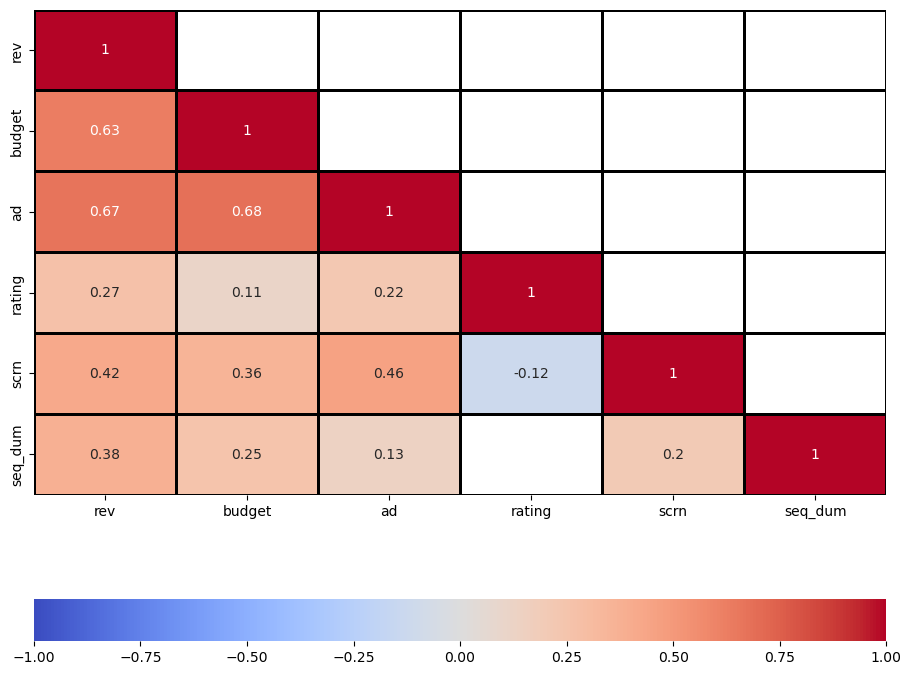

In [20]:
# Plotting with significance filter
corr = df_temp.corr()                            # get correlation
p_values = corr_sig(df_temp)                     # get p-Value
mask = np.invert(np.tril(p_values < 0.05))       # mask - only get significant corr, 
                                                 # tril: low triangular, invert: false -> true, true -> false #
plot_cor_matrix(corr, mask)  

- Correlation matrix only for sequel movies

In [21]:
df_seq = df[df.seq_dum== 1]      # Set of non-sequels. Same as: ns=df.loc[df.seq_dum==1]

In [22]:
# Creating a new dataframe which drops the character variables which cannot be included in a correlation matrix.
columns_to_drop1 = ['title', 'open', 'sequel', 'seq_dum']
df_seq_temp = df_seq.drop(columns=columns_to_drop1, axis=1)

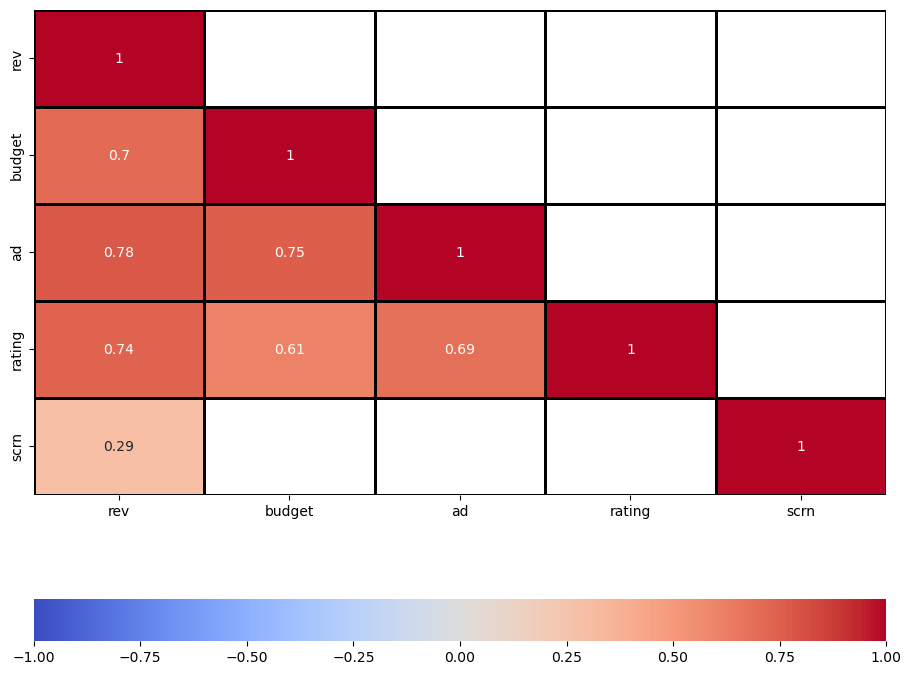

In [23]:
# Plotting with significance filter
corr = df_seq_temp.corr()                            # get correlation
p_values = corr_sig(df_seq_temp)                     # get p-Value
mask = np.invert(np.tril(p_values < 0.05))       # mask - only get significant corr, 
                                                 # tril: low triangular, invert: false -> true, true -> false #
plot_cor_matrix(corr, mask)  

- Correlation matrix only for "NO" sequel movies

In [24]:
df_noseq = df[df.seq_dum== 0]      # Set of non-sequels. Same as: ns=df.loc[df.seq_dum==0]

In [25]:
# Creating a new dataframe which drops the character variables which cannot be included in a correlation matrix.
columns_to_drop1 = ['title', 'open', 'sequel', 'seq_dum']
df_noseq_temp = df_noseq.drop(columns=columns_to_drop1, axis=1)

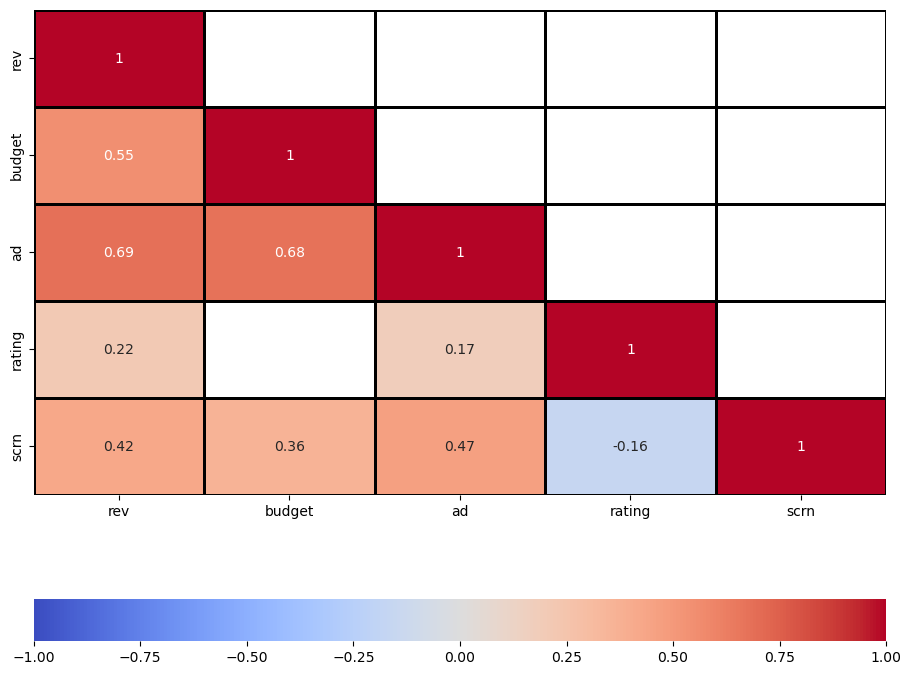

In [26]:
# Plotting with significance filter
corr = df_noseq_temp.corr()                            # get correlation
p_values = corr_sig(df_noseq_temp)                     # get p-Value
mask = np.invert(np.tril(p_values < 0.05))       # mask - only get significant corr, 
                                                 # tril: low triangular, invert: false -> true, true -> false #
plot_cor_matrix(corr, mask)  

- The correlation between revenue and ad is the highest. 
- The correlation between ad and rating is statistically significant (p-value is less than 5%).

### 5. Draw scatter plots showing the relationships among the variables in the data. Also, draw the same scatter plots for 'Sequel' dataset and 'NoSeq' dataset respectively. Explain your findings from the graphs.

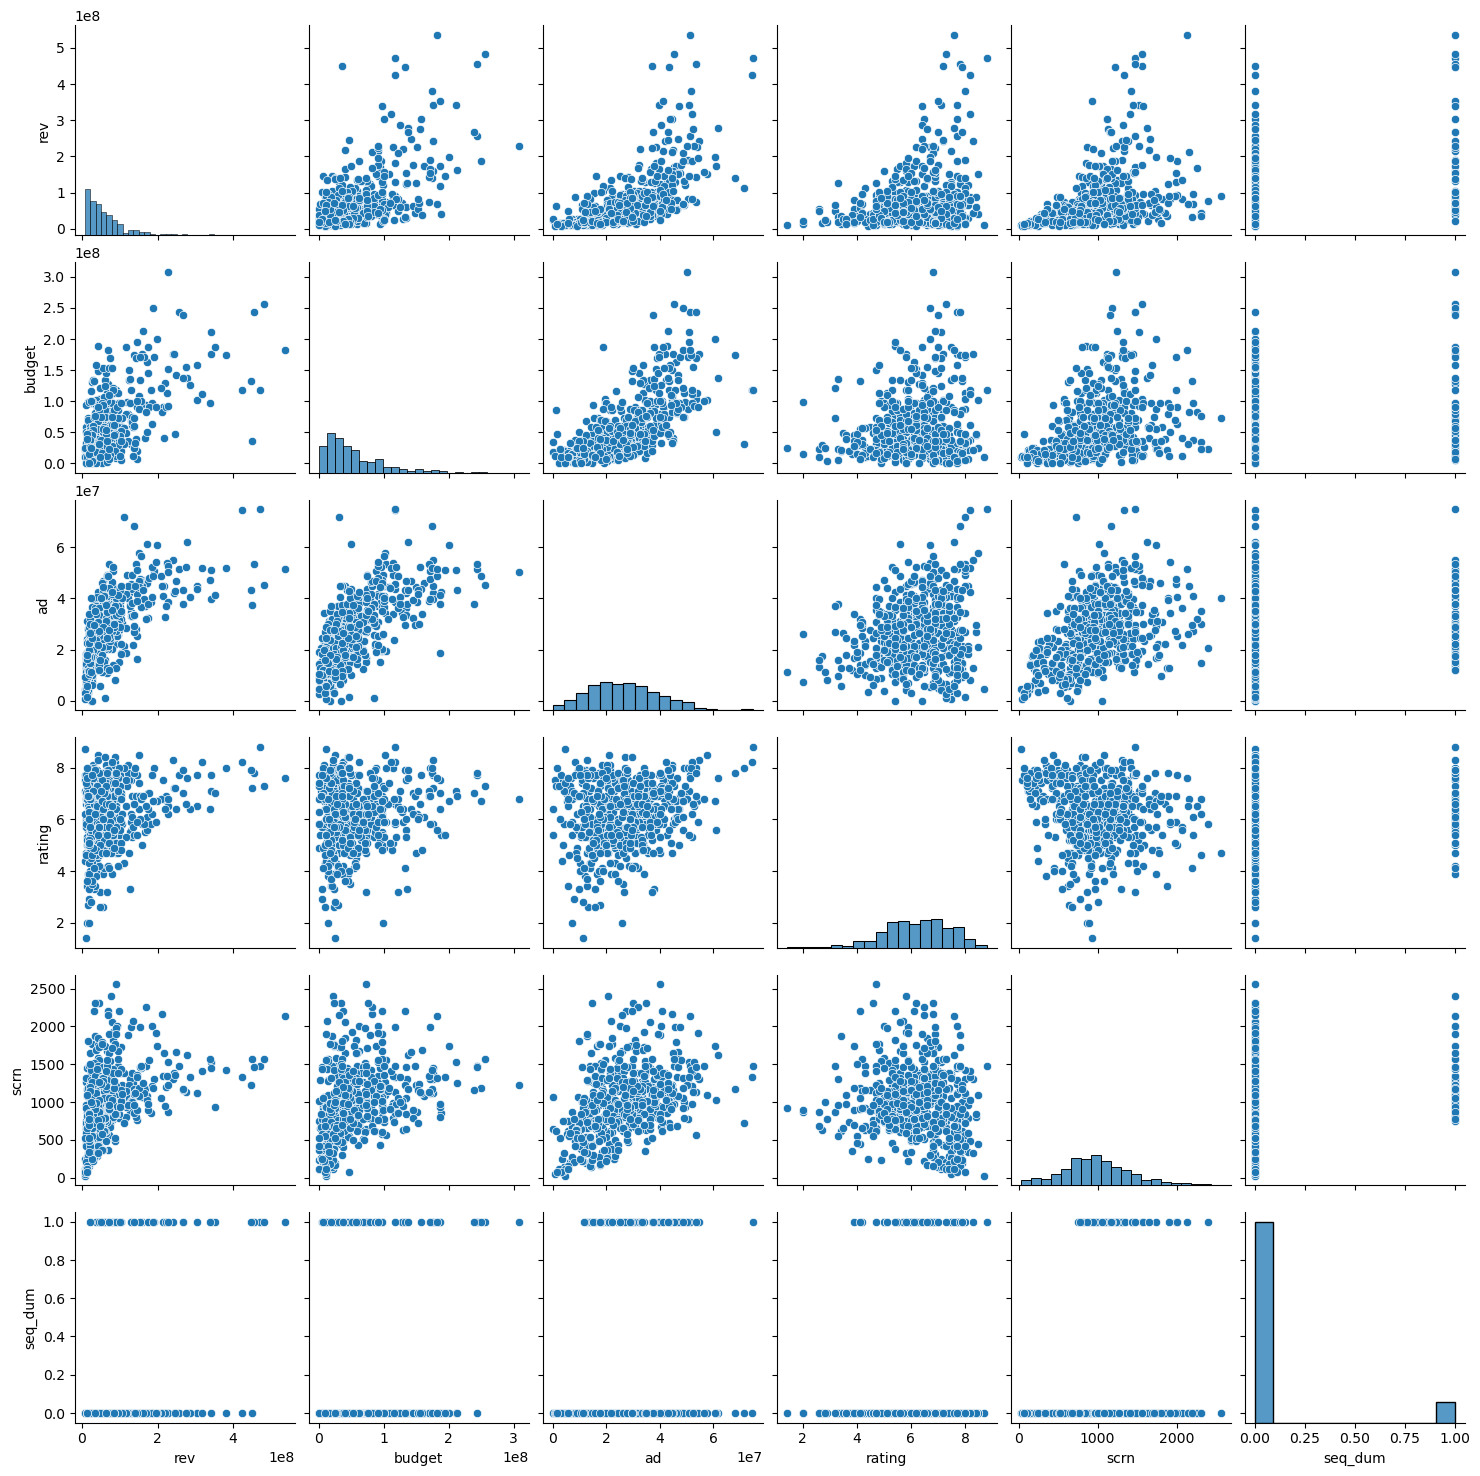

In [28]:
sns.pairplot(df)
plt.show()

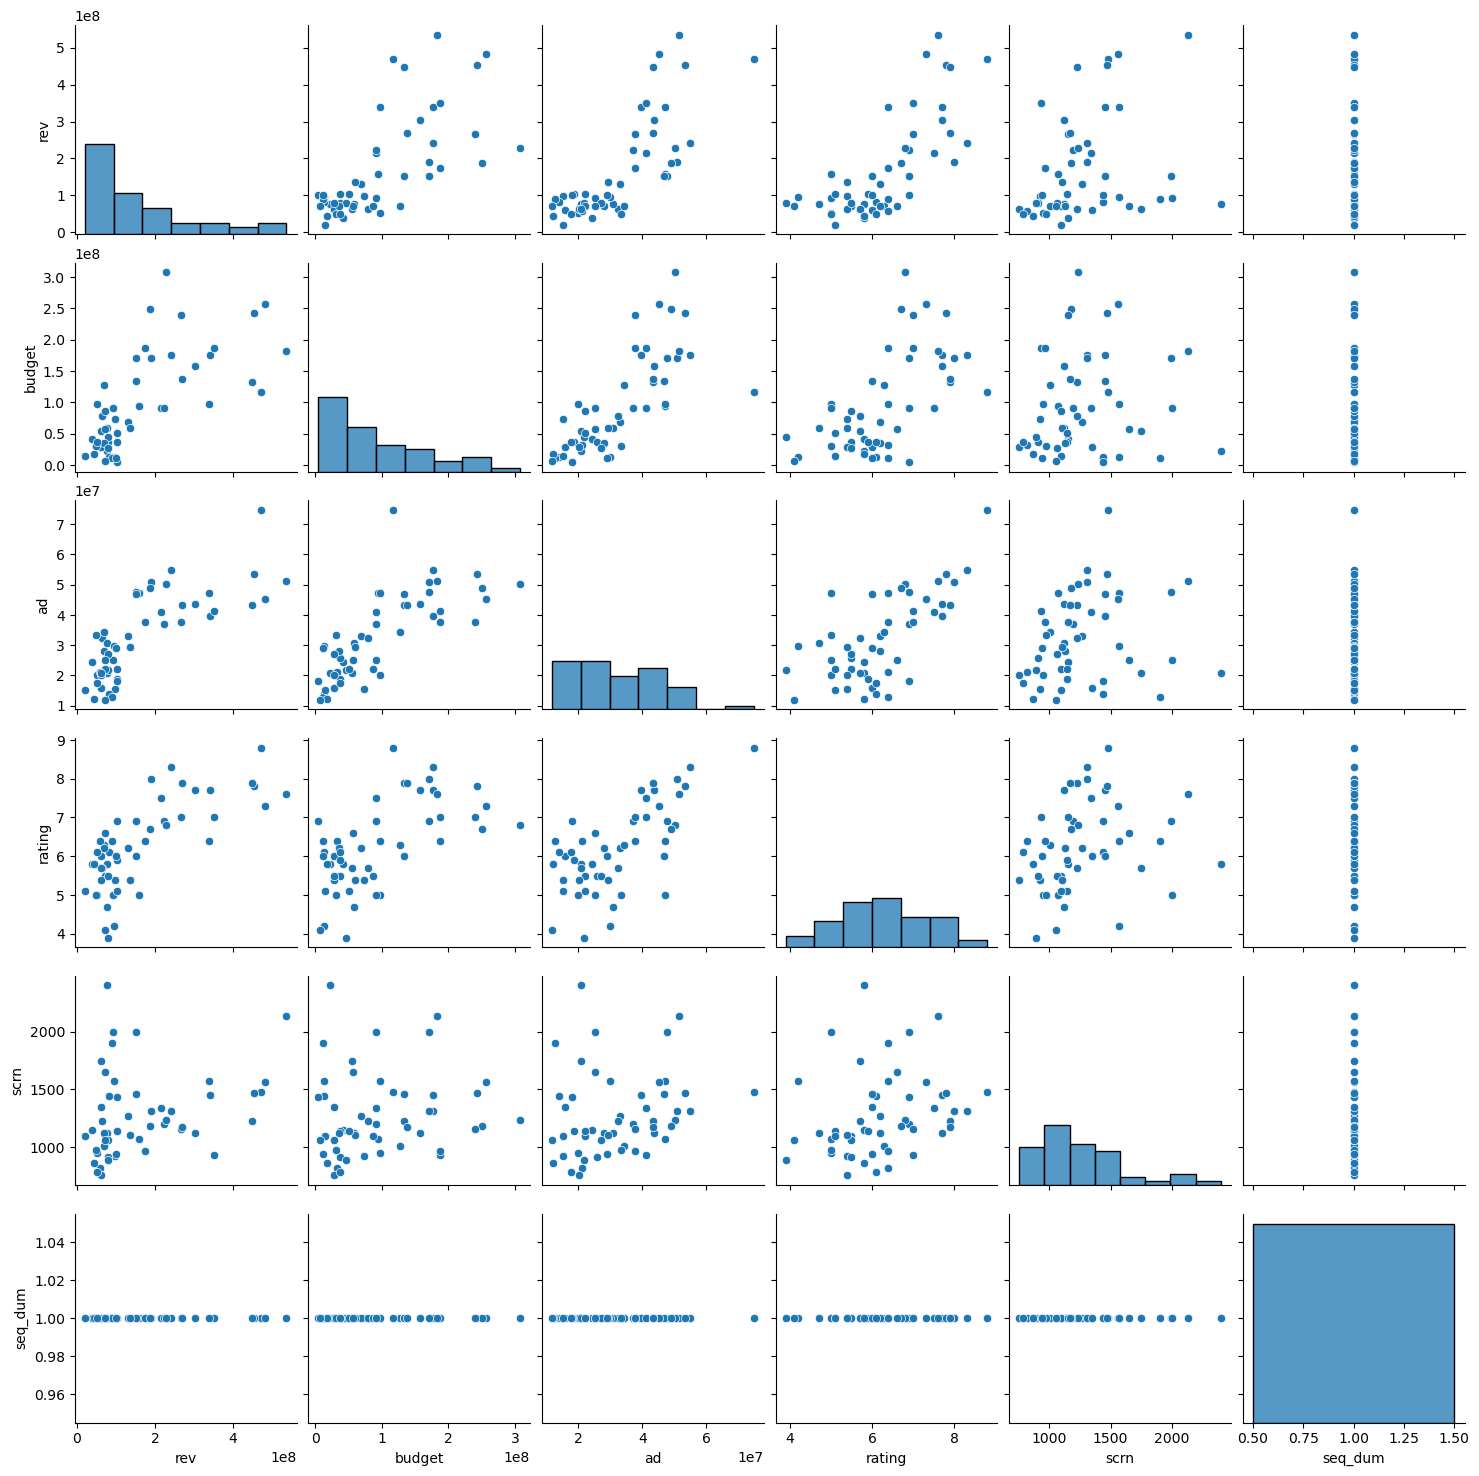

In [29]:
sns.pairplot(df_seq)
plt.show()

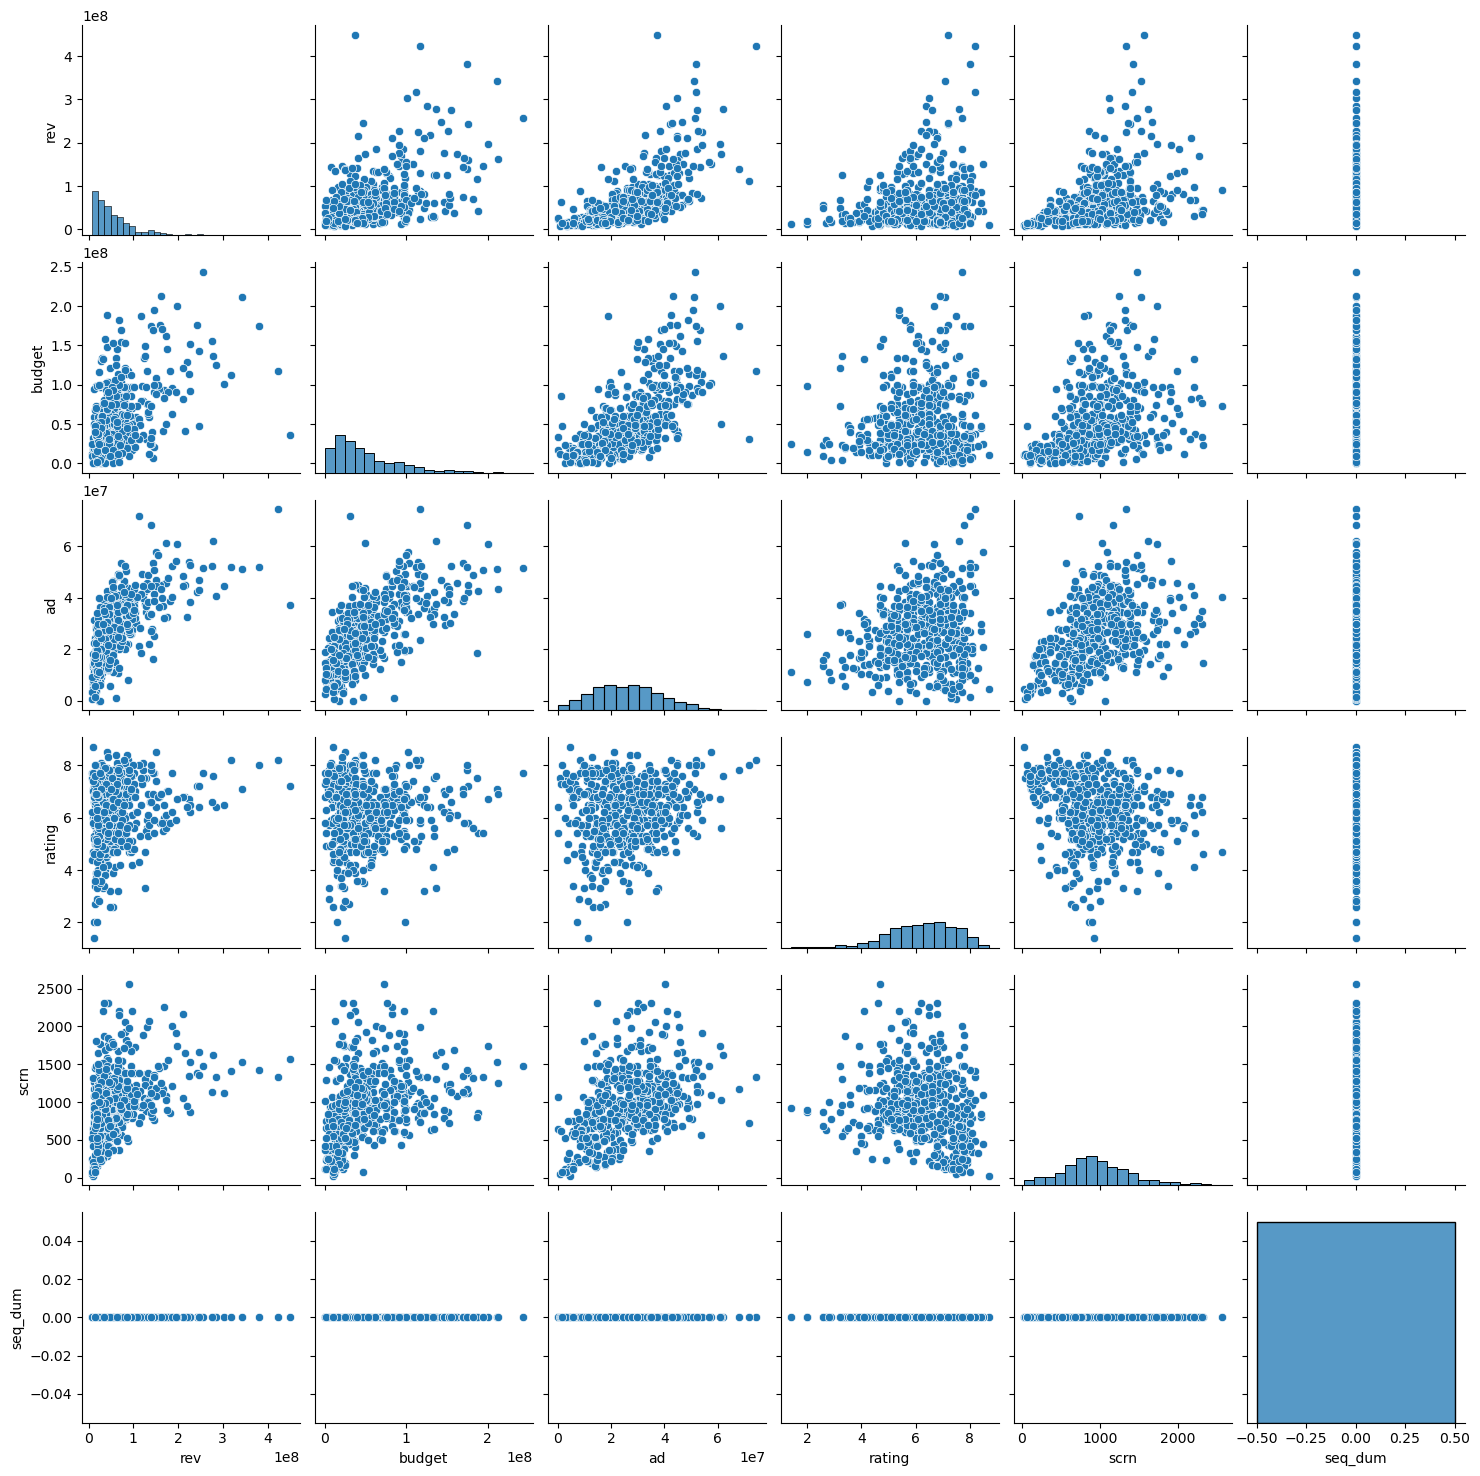

In [30]:
sns.pairplot(df_noseq)
plt.show()

- check the relationships which you are interested in by drawing scatterplots only for those variables.

Text(0.5, 1.0, 'Ad vs. Revenue')

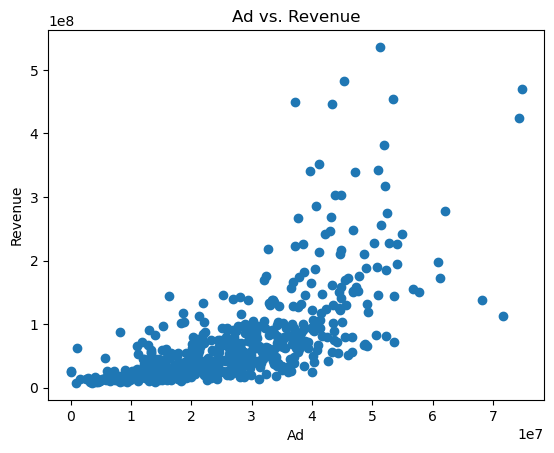

In [31]:
plt.scatter(df.ad, df.rev)  # (x,y)
plt.xlabel("Ad")
plt.ylabel("Revenue")
plt.title('Ad vs. Revenue')

Text(0, 0.5, 'Rating')

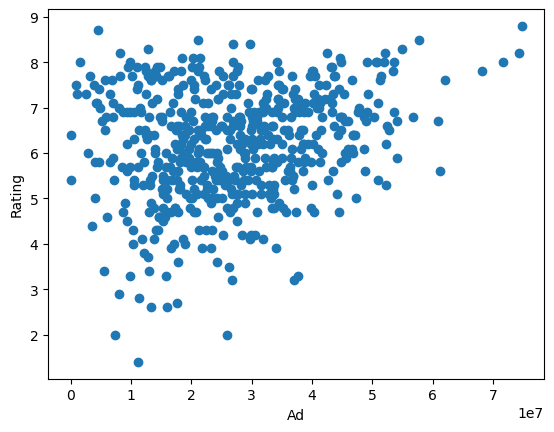

In [32]:
plt.scatter(df.ad, df.rating)
plt.xlabel("Ad")
plt.ylabel("Rating")

- Ad and revenue have a positive and potentially non-linear relationship.
- Ad and rating seem to have a positive relation but do not show a clear pattern.

<Axes: xlabel='ad', ylabel='rev'>

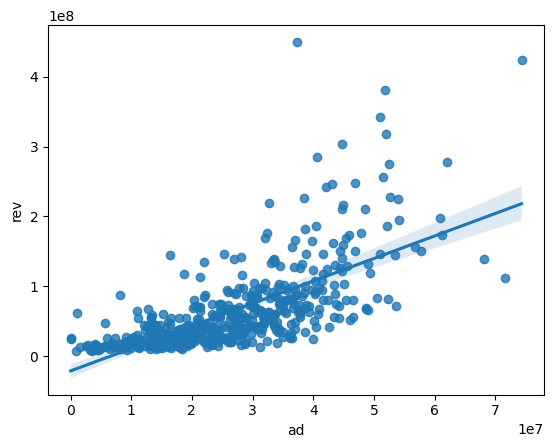

In [33]:
sns.regplot(x=df_noseq.ad, y=df_noseq.rev)  # non-sequel

<Axes: xlabel='ad', ylabel='rev'>

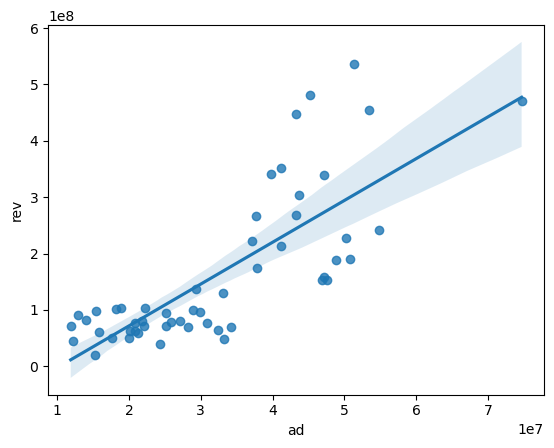

In [34]:
sns.regplot(x=df_seq.ad, y=df_seq.rev)  # sequel

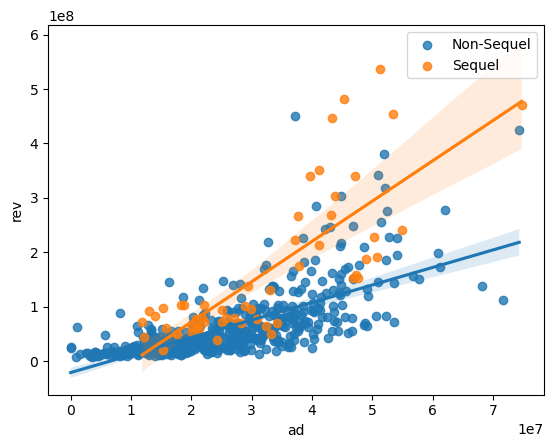

In [35]:
# Put sequel and non-sequel together

nonseq=sns.regplot(x=df_noseq.ad, y=df_noseq.rev, label='Non-Sequel')
seq   =sns.regplot(x=df_seq.ad,  y=df_seq.rev,  label='Sequel')
seq.legend()  # put legend

- Ad and revenue have positive relationships for both sequels and non-sequels. However, the returns to advertising are much higher for sequels.

### 6. Run the following multivariate regression model and try to interpret the outputs.
* Rev = b0 + b1 Budget + b2 Ad + b3 Rating + b4 Scrn + b5 Sequel

In [36]:
# Method 1

import statsmodels.formula.api as sm

m = sm.ols('rev ~ budget + ad + rating + scrn + seq_dum', df).fit()  # constant is added by default
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    rev   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     164.8
Date:                Mon, 30 Oct 2023   Prob (F-statistic):          3.33e-107
Time:                        14:07:49   Log-Likelihood:                -10723.
No. Observations:                 561   AIC:                         2.146e+04
Df Residuals:                     555   BIC:                         2.148e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.039e+08   1.23e+07     -8.464      0.000   -1.28e+08   -7.98e+07
budget         0.3839      0.060      6.429      0.000       0.267       0.501
ad             2.1583      0.236      9.144      0.000       1.695       2.622
rating      1.107e+07    1.8e+06      6.159      0.000    7.54e+06    1.46e+07
scrn        2.303e+04   5454.826      4.222      0.000    1.23e+04    3.37e+04
seq_dum     6.267e+07   7.36e+06      8.514      0.000    4.82e+07    7.71e+07
==============================================================================
Omnibus:                      257.661   Durbin-Watson:                   2.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1912.475
Skew:                           1.870   Prob(JB):                         0.00
Kurtosis:                      11.236   Cond. No.                     4.76e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.76e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
m.params  # Get only coefficients

Intercept   -1.039451e+08
budget       3.839076e-01
ad           2.158311e+00
rating       1.106823e+07
scrn         2.303230e+04
seq_dum      6.266794e+07
dtype: float64

In [38]:
# Method 2

import statsmodels.api as sm1

m1 = sm1.OLS.from_formula('rev ~ budget + ad + rating + scrn + seq_dum', df).fit()  # constant is added by default
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    rev   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     164.8
Date:                Mon, 30 Oct 2023   Prob (F-statistic):          3.33e-107
Time:                        14:07:49   Log-Likelihood:                -10723.
No. Observations:                 561   AIC:                         2.146e+04
Df Residuals:                     555   BIC:                         2.148e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.039e+08   1.23e+07     -8.464      0.000   -1.28e+08   -7.98e+07
budget         0.3839      0.060      6.429      0.000       0.267       0.501
ad             2.1583      0.236      9.144      0.000       1.695       2.622
rating      1.107e+07    1.8e+06      6.159      0.000    7.54e+06    1.46e+07
scrn        2.303e+04   5454.826      4.222      0.000    1.23e+04    3.37e+04
seq_dum     6.267e+07   7.36e+06      8.514      0.000    4.82e+07    7.71e+07
==============================================================================
Omnibus:                      257.661   Durbin-Watson:                   2.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1912.475
Skew:                           1.870   Prob(JB):                         0.00
Kurtosis:                      11.236   Cond. No.                     4.76e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.76e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
# Method 3

import statsmodels.api as sm1

y=df.rev
x=df[['budget', 'ad', 'rating', 'scrn', 'seq_dum']]
x=sm1.add_constant(x)  # Need to add constant to x
    
m2 = sm1.OLS(y, x).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    rev   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     164.8
Date:                Mon, 30 Oct 2023   Prob (F-statistic):          3.33e-107
Time:                        14:07:53   Log-Likelihood:                -10723.
No. Observations:                 561   AIC:                         2.146e+04
Df Residuals:                     555   BIC:                         2.148e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.039e+08   1.23e+07     -8.464      0.000   -1.28e+08   -7.98e+07
budget         0.3839      0.060      6.429      0.000       0.267       0.501
ad             2.1583      0.236      9.144      0.000       1.695       2.622
rating      1.107e+07    1.8e+06      6.159      0.000    7.54e+06    1.46e+07
scrn        2.303e+04   5454.826      4.222      0.000    1.23e+04    3.37e+04
seq_dum     6.267e+07   7.36e+06      8.514      0.000    4.82e+07    7.71e+07
==============================================================================
Omnibus:                      257.661   Durbin-Watson:                   2.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1912.475
Skew:                           1.870   Prob(JB):                         0.00
Kurtosis:                      11.236   Cond. No.                     4.76e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.76e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Adjusted R-square is lower thant R-square, but the difference is minor because independent variables are relevant in predicting (explaining) the dependent variable.

### 7. Check the three assumptions on the error (i.e., Normality, Homoscedasticity, Independence of Errors) hold.

In [40]:
# 1. Normality

residuals = m.resid   # resid  is the option code for generating the residuals based on the regression results ('m')

C:\Users\minchung\AppData\Local\Temp\ipykernel_17128\2281573945.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, bins=10)


Text(0.5, 1.0, 'Distribution of residuals')

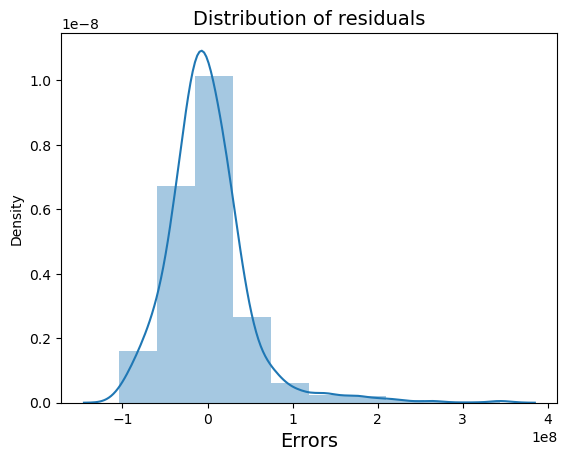

In [41]:
sns.distplot(residuals, bins=10)

# Plot heading

plt.xlabel('Errors', fontsize=14)
plt.title('Distribution of residuals', fontsize=14)

- Checking Q-Q plot

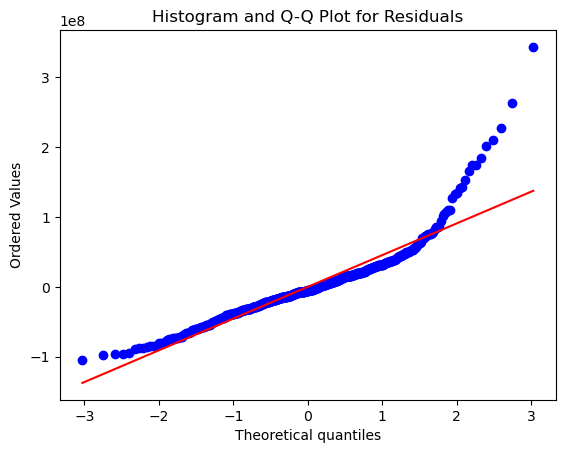

In [42]:
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Histogram and Q-Q Plot for Residuals")
plt.show()

In [43]:
# 2. homoscedasticity

predicted = m.predict(df)   # predict  is the option code for generating the predicted values based on the regression results ('m')

Text(0, 0.5, 'predicted')

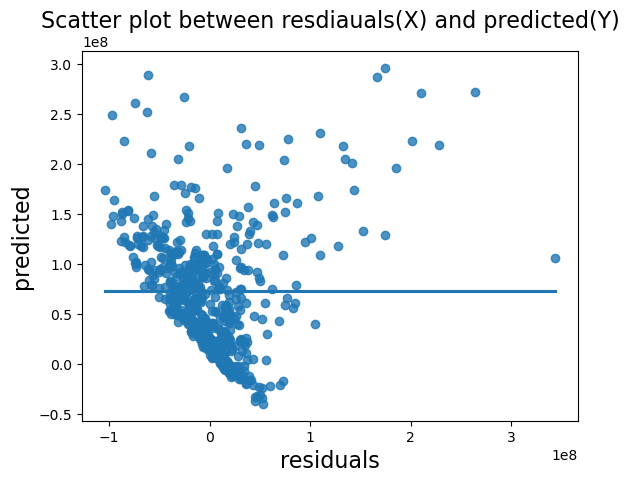

In [44]:
sns.regplot(x=residuals, y=predicted, ci=None)

plt.title('Scatter plot between resdiauals(X) and predicted(Y)', fontsize = 16)     # X-label
plt.xlabel('residuals', fontsize = 16)     # X-label
plt.ylabel('predicted', fontsize = 16)     # Y-label

In [45]:
# 3. independence, Dubin-Watson stat is around 2, so that the independence assumption holds.

### 8. Which independent variables are not significant? (Use 5% significance level)

* All variables are significant at 1% level (p-values are less than 1%)

###  9.	Interpret statistically significant coefficients. (Use 5% significance level)

* A one dollar increase in budget increases box office revenues by 0.38 dollar
* A one dollar increase in ad increases box office revenues by 2.16 dollar
* A one dollar point increase in rating increases box office revenues by 11.07 million dollar
* Sequels earn 62.67 million dollar higher in box office revenues than non-sequels
* One more average screen increases box office revenues by 23,000 dollar

### 10. Predict revenue for the following movie. 
- Budget=$\$$10 million, Ad=$\$$1 milllion, Sequel, Rating=7, Screen=500

In [46]:
m.predict({'budget':10000000, 'ad':1000000, 'rating':7, 'scrn':500, 'seq_dum':1})

0    5.371394e+07
dtype: float64

- The revenue of the new movie will be $53.7 millions.

### 11. Generate predicted revenues for the all observations in the data. What is the predicted revenue for “2 Fast 2 Furious”?

In [47]:
pred_rev=m.predict(df)
pred_rev.head()

0    8.837430e+07
1    7.894339e+07
2    1.770780e+08
3    2.416797e+07
4    2.462683e+07
dtype: float64

In [48]:
pred_rev=pd.DataFrame(m.predict(df), columns=['pred_rev'])  # Change to dataframe
pred_rev.head()

,pred_rev
0,8.837430e+07
1,7.894339e+07
2,1.770780e+08
3,2.416797e+07
4,2.462683e+07


In [53]:
df = pd.concat([df, pred_rev], axis=1)
df[df['title'] == '2 FAST 2 FURIOUS']

,title,open,rev,budget,ad,rating,scrn,sequel,seq_dum,pred_rev,pred_rev
2,2 FAST 2 FURIOUS,6/6/2003,158745200,94881400,47201120,5.0,1073,Seq,1,1.770780e+08,1.770780e+08


- The predicted revenue for “2 Fast 2 Furious" is $177.1 millions.

### 12. Change the unit of Budget and Ad into 'million' dollars and run the same regression model. What difference do you see? Interpret the coefficients of Budget and Ad.

In [54]:
df['ad1'] = df.ad/1000000
df['budget1']= df.budget/1000000
df.head()

,title,open,rev,budget,ad,rating,scrn,sequel,seq_dum,pred_rev,pred_rev,ad1,budget1
0,13 GOING ON 30,4/23/2004,69540400,44957472,36712516,6.1,1229,NoSeq,0,8.837430e+07,8.837430e+07,36.712516,44.957472
1,16 BLOCKS,3/3/2006,42021800,51252848,30141800,6.7,1042,NoSeq,0,7.894339e+07,7.894339e+07,30.141800,51.252848
2,2 FAST 2 FURIOUS,6/6/2003,158745200,94881400,47201120,5.0,1073,Seq,1,1.770780e+08,1.770780e+08,47.201120,94.881400
3,21 GRAMS,11/21/2003,20337672,24968790,12344444,7.9,193,NoSeq,0,2.416797e+07,2.416797e+07,12.344444,24.968790
4,28 DAYS LATER,6/27/2003,56260816,9987516,13260048,7.6,521,NoSeq,0,2.462683e+07,2.462683e+07,13.260048,9.987516


In [55]:
m = sm.ols('rev ~ budget1 + ad1 + rating + scrn + seq_dum', df).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    rev   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     164.8
Date:                Mon, 30 Oct 2023   Prob (F-statistic):          3.33e-107
Time:                        14:10:58   Log-Likelihood:                -10723.
No. Observations:                 561   AIC:                         2.146e+04
Df Residuals:                     555   BIC:                         2.148e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.039e+08   1.23e+07     -8.464      0.000   -1.28e+08   -7.98e+07
budget1     3.839e+05   5.97e+04      6.429      0.000    2.67e+05    5.01e+05
ad1         2.158e+06   2.36e+05      9.144      0.000    1.69e+06    2.62e+06
rating      1.107e+07    1.8e+06      6.159      0.000    7.54e+06    1.46e+07
scrn        2.303e+04   5454.826      4.222      0.000    1.23e+04    3.37e+04
seq_dum     6.267e+07   7.36e+06      8.514      0.000    4.82e+07    7.71e+07
==============================================================================
Omnibus:                      257.661   Durbin-Watson:                   2.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1912.475
Skew:                           1.870   Prob(JB):                         0.00
Kurtosis:                      11.236   Cond. No.                     6.55e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.55e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- The coefficients of Budget and Ad are much larger but the interpretations remain the same.